Image Compression using CNN

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856 

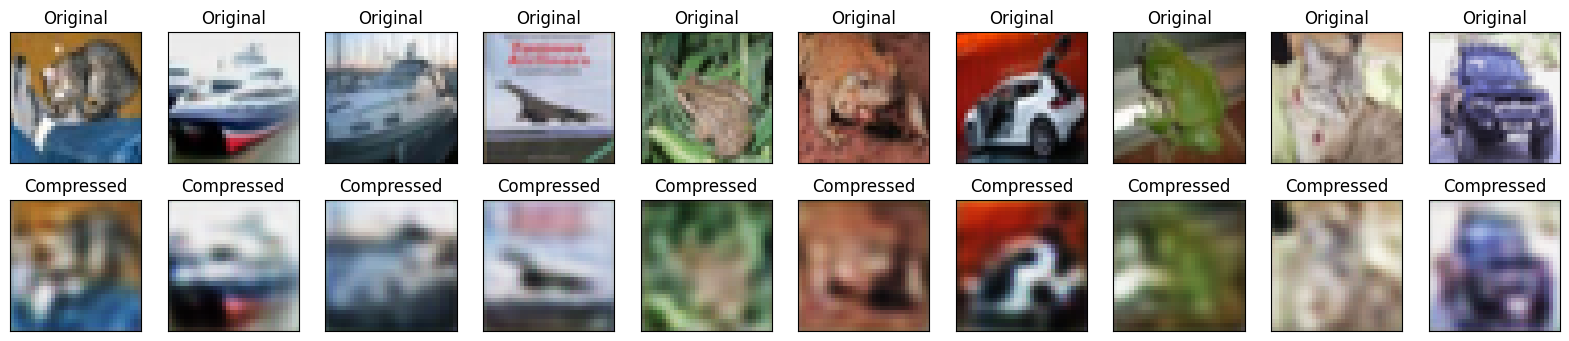

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Load the CIFAR-10 dataset
(x_train, _), (x_test, _) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the custom CNN model architecture
inputs = Input(shape=x_train.shape[1:])

#model for compressing
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv2)

# Latent Space
latent_dim = 128
conv3 = Conv2D(latent_dim, (3, 3), activation='relu', padding='same')(pool2)

conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
upsample1 = UpSampling2D((2, 2))(conv4)
conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(upsample1)
upsample2 = UpSampling2D((2, 2))(conv5)
outputs = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(upsample2)

# Define the model
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
batch_size = 128
epochs = 50
model.fit(x_train, x_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, x_test))

# Evaluate the model
mse = model.evaluate(x_test, x_test)
print("Mean Squared Error:", mse)

# Perform image compression on test images
compressed_images = model.predict(x_test)

# Display original and compressed images
import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Compressed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(compressed_images[i])
    plt.title("Compressed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
